# Scatter Artist

In this example notebook, we show how to create a scatter plot using the `Scatter` class. The `Scatter` class is a subclass of the `Artist` class.

It has a simplified interface for creating scatter plots and updating some of its properties, like assigning different classes to points and displaying them with different colors based on a categorical colormap.

It can be imported like shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biaplotter.artists import Scatter

## Creating a Scatter Plot

To create an empty scatter plot, just instanciate the `Scatter` class and provide an axes object as an argument.

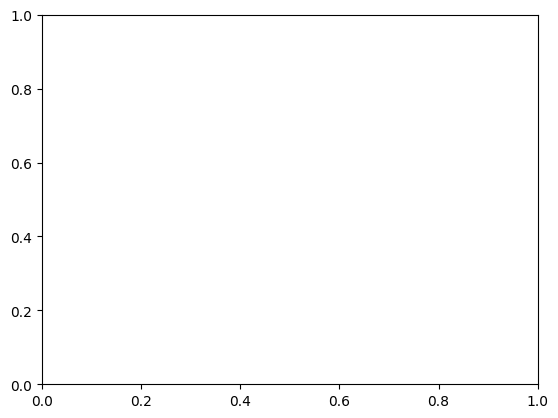

In [2]:
fig, ax = plt.subplots()
scatter = Scatter(ax)

## Adding Data to the Scatter Artist

To add data to the scatter plot, just feed the property `data` with a (N, 2) shaped numpy array. The plot gets updated automatically every time one of its properties is changed.

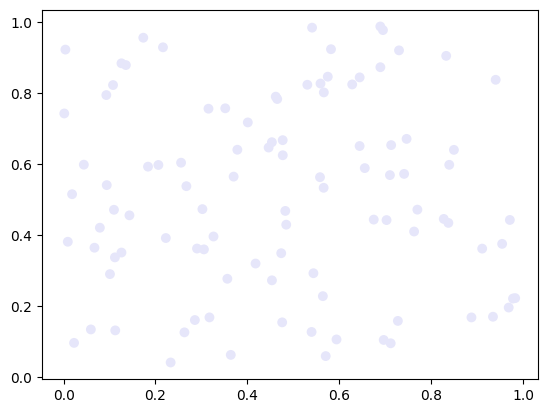

In [3]:
n_samples = 100
data = np.random.rand(n_samples, 2)
scatter.data = data
fig # show the updated figure

## Assigning Classes to Data Points

The `Scatter` artist comes with a custom categorical colormap, which can be used to assign different classes to points.

You can access the scatter current categorical colormap via its private `_colormap` attribute.

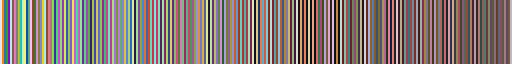

In [4]:
scatter.categorical_colormap

To assign classes to points, just feed the property `color_indices` with a (N,) shaped numpy array containing integers. These integers will be used as indices to the colormap.

Below, we randomly color the points with the 5 first colors of the scatter default colormap (light gray is the default color with color index 0).

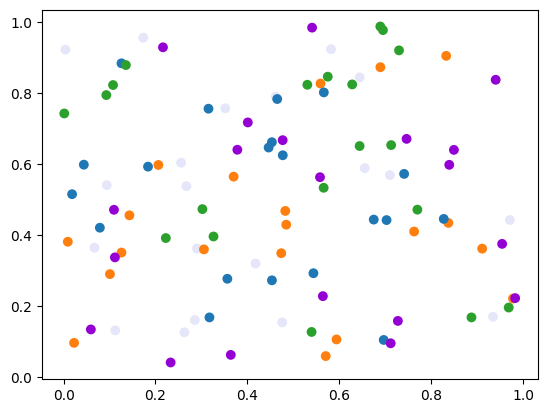

In [5]:
color_indices = np.linspace(start=0, stop=5, num=n_samples, endpoint=False, dtype=int)
scatter.color_indices = color_indices
fig

Changing the data - i.e., adding new data of the *same size* will keep the point properties (e.g., the `color_indices`) as they are:

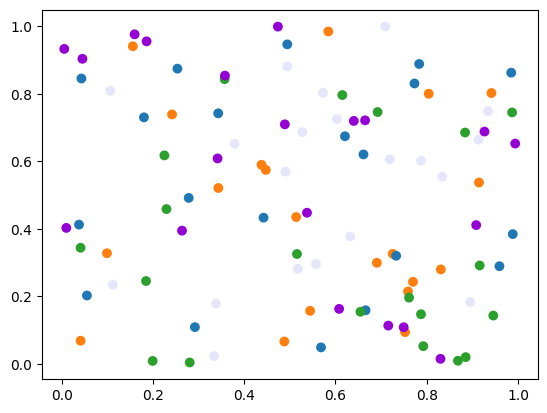

In [6]:
data = np.random.rand(n_samples, 2)
scatter.data = data
fig

Adding new data of a different size resets the coloring:

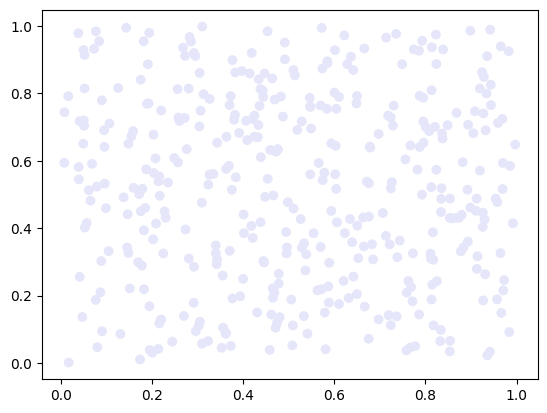

In [7]:
# Adding 400 more samples
n_samples = 400
data = np.random.rand(n_samples, 2)
scatter.data = data
fig

## Setting point properties

You can also set other properties of the points, like their transparency. This is mediated through the `alpha` property. In this case, we set the transparency of the points according to the respective point's x coordinate, so we should observe a transparency gradient from left to right.

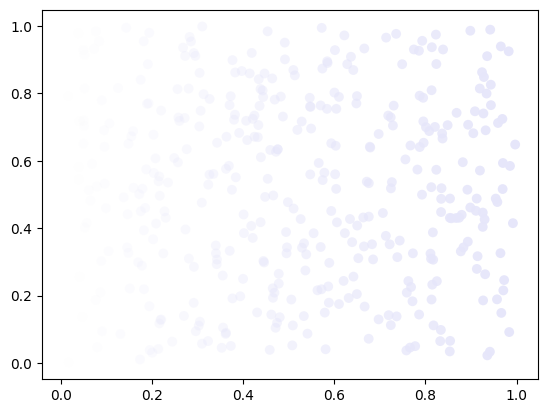

In [8]:
alpha = data[:, 0]
alpha = (alpha - alpha.min()) / (alpha.max() - alpha.min())
scatter.alpha = alpha
fig

Again, changing the data will keep the point properties as they are:

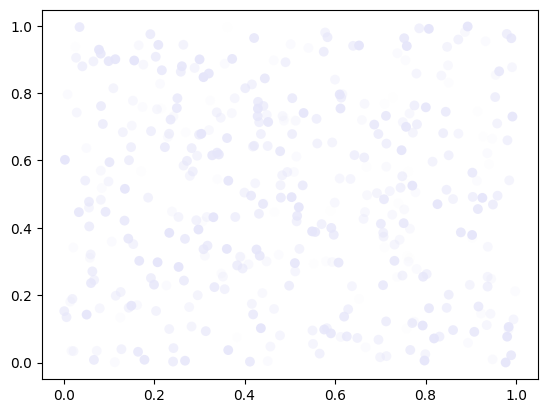

In [9]:
data = np.random.rand(n_samples, 2)
scatter.data = data
fig

You can undo this by simply setting all alpha values to 1:

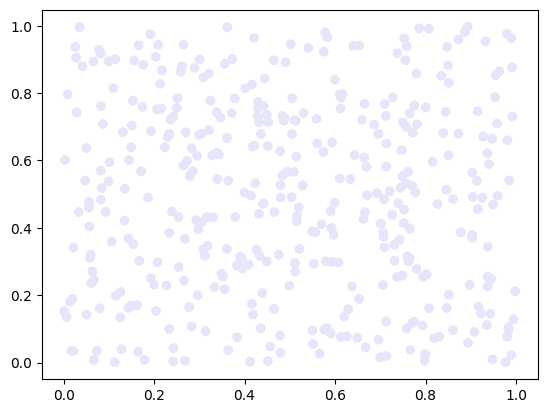

In [10]:
scatter.alpha = 1
fig

You can also set the sizes of the points (values around ~50 are typically a good starting point):

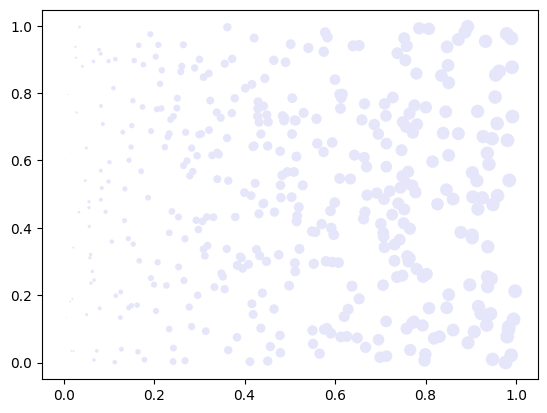

In [11]:
size = data[:, 0] * 100
scatter.size = size
fig

And again, changing the data but keeping the size of the data (i.e., the number of samples, to be more precise) will keep the point properties as they are:

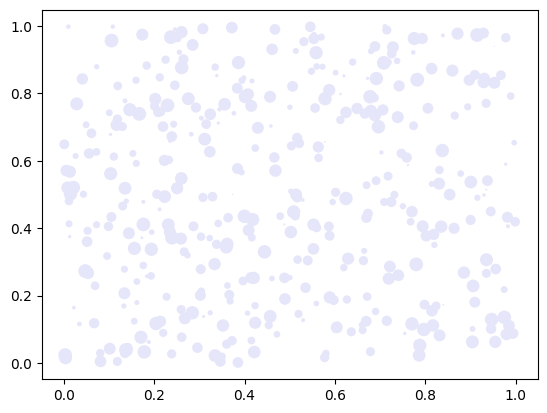

In [12]:
data = np.random.rand(n_samples, 2)
scatter.data = data
fig

## Scatter Visibility

Optionally, hide/show the artist by setting the `visible` attribute.

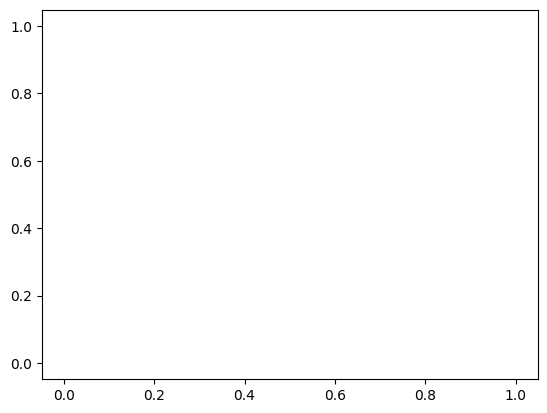

In [13]:
scatter.visible = False
fig

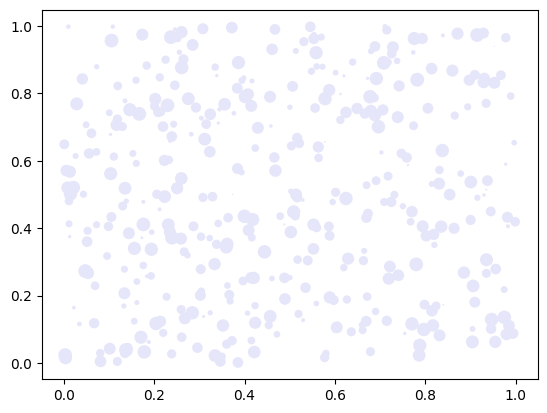

In [14]:
scatter.visible = True
fig